### 자료 불러오기

In [157]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 결측치 확인

In [158]:
# 결측치 확인
print(df.isnull().sum()) # 결측치 없음

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Outcome 열 제거

In [159]:
# outcome 열 제거
df = df.drop(['Outcome'], axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


### 인코딩

In [160]:
from sklearn.tree import DecisionTreeRegressor
# 인코딩
encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = encoder.fit_transform(df[column])
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


### x, y 분할, 훈련 데이터와 테스트 데이터 분할

In [161]:
# 특징과 결과값 지정
X = df.drop(['BMI'], axis=1).values
Y = df['BMI'].values
# df를 numpy로 변환

# 훈련 데이터와 테스트 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Shape 확인

In [162]:
# 행과 열 확인해서 shape 확인하기
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614,), (154,))

### 레이블 확인

In [163]:
# 레이블 확인
# 각 값이 몇 번 등장했는지 빈도수를 계산
df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

### 전처리(표준화)

In [164]:
# 전처리(표준화)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train) # StandardScaler 꼭 train 데이터의 input으로 해줘야한다.
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

### RandomForestRegressor

=====RandomForestRegressor=====
평균 제곱근 오차: 50.72221040259743


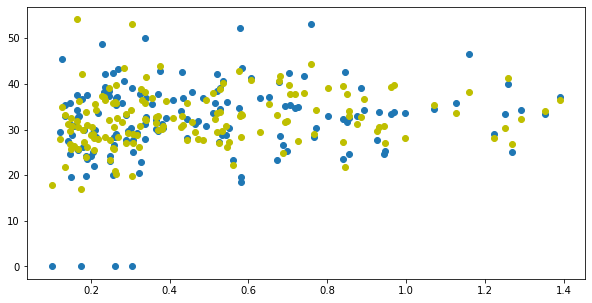

In [165]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

print("=====RandomForestRegressor=====")
rf = RandomForestRegressor()

rf.fit(train_scaled, y_train)
y_pred = rf.predict(test_scaled)

mse_value = mean_squared_error(y_test, y_pred)
print("평균 제곱근 오차:", mse_value)

# 산점도 표시
plt.figure(figsize=(10,5)) # 도화지 생성 
plt.scatter(X_test[:, 5], y_test, label='y_test')
plt.scatter(X_test[:, 5], y_pred, c='y', label='y_pred')
plt.show()

### DecisionTreeRegressor

=====DecisionTreeRegressor=====
평균 제곱근 오차: 62.563499653484186


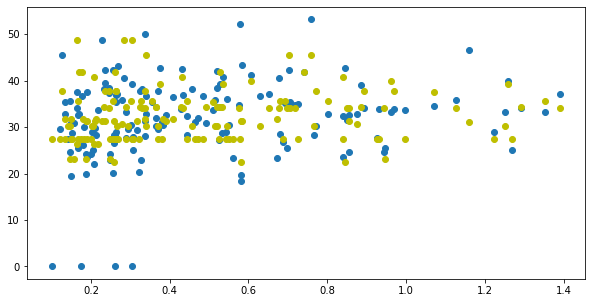

In [166]:
print("=====DecisionTreeRegressor=====")
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5) # 과적합 방지

dt.fit(train_scaled, y_train)
y_pred = dt.predict(test_scaled)

mse_value = mean_squared_error(y_test, y_pred)
print("평균 제곱근 오차:", mse_value)

# 산점도 표시
plt.figure(figsize=(10,5)) # 도화지 생성 
plt.scatter(X_test[:, 5], y_test, label='y_test')
plt.scatter(X_test[:, 5], y_pred, c='y', label='y_pred')
plt.show()

### LinearRegression

=====LinearRegression=====
평균 제곱근 오차: 52.24058284874793


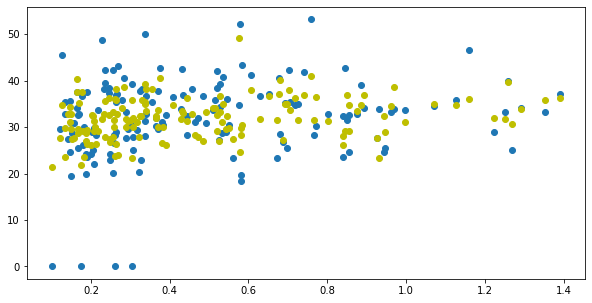

In [167]:
print("=====LinearRegression=====")
lr = LinearRegression()

lr.fit(train_scaled, y_train)
y_pred = lr.predict(test_scaled)

mse_value = mean_squared_error(y_test, y_pred)
print("평균 제곱근 오차:", mse_value)

# 산점도 표시
plt.figure(figsize=(10,5)) # 도화지 생성 
plt.scatter(X_test[:, 5], y_test, label='y_test')
plt.scatter(X_test[:, 5], y_pred, c='y', label='y_pred')
plt.show()

### SVR

=====SVR=====
평균 제곱근 오차: 47.623601234839676


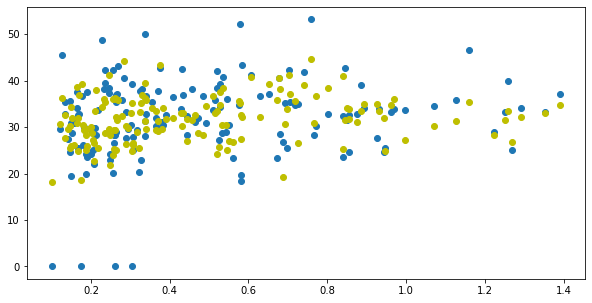

In [168]:
print("=====SVR=====")
svr = SVR(C=15)

svr.fit(train_scaled, y_train)
y_pred = svr.predict(test_scaled)

mse_value = mean_squared_error(y_test, y_pred)
print("평균 제곱근 오차:", mse_value)

# 산점도 표시
plt.figure(figsize=(10,5)) # 도화지 생성 
plt.scatter(X_test[:, 5], y_test, label='y_test')
plt.scatter(X_test[:, 5], y_pred, c='y', label='y_pred')
plt.show()